In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as Scaler
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
def LinearRegression(X,Y):
    XX=np.dot(X.T,X)
    XY=np.dot(X.T,Y)
    XX_=np.linalg.inv(XX)
    
    return np.dot(XX_,XY)

class Estimator:
    def __init__(self,n=6):
         self.n=n+1

    
    def fit_transform(self,df):
         n=self.n
         dx=df['time'].diff().iloc[1]

         for i in range(1,n):
          df['X'+'D'*i]=(df['X'+'D'*(i-1)].diff(2)/(2*dx)).shift(-1)


         df=df.dropna()
         self.polinomial=LinearRegression(df[['X'+'D'*d for d in range(1,n)]].to_numpy(),df['X'].to_numpy())
         self.polinomial=([-1]+list(self.polinomial))[::-1]
            
         self.roots=np.roots(self.polinomial)

         Prediction=np.e**np.dot(self.roots.reshape(-1,1),df['time'].to_numpy().reshape(1,-1))
         Coef=LinearRegression(Prediction.T,df['X'].to_numpy())
            
         self.coef=Coef
         Result=np.dot(Coef,Prediction).real
         return np.pad(Result,self.n-1)
    def predict(self,df):
        roots,coef=(self.roots,self.coef)
        X=df['time'].to_numpy()
        Res=np.e**np.dot(self.roots.reshape(-1,1),X.reshape(1,-1))
        Res=np.dot(coef,Res).real
        return Res

[-1.590101543269012e-05, -4.385579749541959e-08, -0.011548842455621726, -1.4407212472387042e-05, -1]


<AxesSubplot:xlabel='time'>

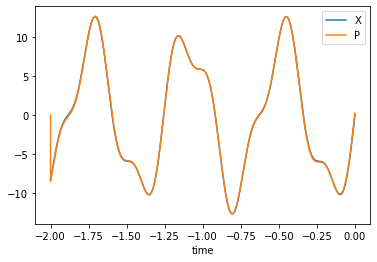

In [3]:
time=np.arange(100000)
time=time-sum(time[[0,-1]])/2
time=time/time[-1]
time=time-1

est=Estimator(4)
X=np.sin(time*10)*10+np.sin(time*25)*3
df=pd.DataFrame({'time':time,'X':X})
P=est.fit_transform(df)
print(est.polinomial)
df['P']=P
df.plot(x='time',y=['X','P'])

In [4]:
Prices=pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [5]:
Prices['Timestamp']=pd.to_datetime(Prices['Timestamp'],unit='s')
Prices=Prices[['Timestamp','Weighted_Price']]
Prices.columns=['Time','Price']

# dropping NAN values and filering the recent data
Prices=Prices.drop(Prices[Prices['Price']!=Prices['Price']].index) 
Prices=Prices[Prices.Time.dt.year>=2021]

# Rounding to nearest 10 minutes and taking their mean
Prices.Time=Prices.Time.dt.round('10min')
Prices=Prices.groupby('Time').mean('Price').reset_index()


In [6]:
Prices=Prices[["Price"]]
Prices.reset_index(drop=True,inplace=True)
Prices.reset_index(inplace=True)
Prices.columns=['time','X']

time=Prices['time'].to_numpy()
time=time-sum(time[[0,-1]])/2
time=time/time[-1]
time=time-1
time=time*20
Prices['time']=time

Prices['X']=Scaler().fit_transform(Prices['X'].to_numpy().reshape(-1,1))
X=Prices['X'].to_numpy()

<AxesSubplot:xlabel='time'>

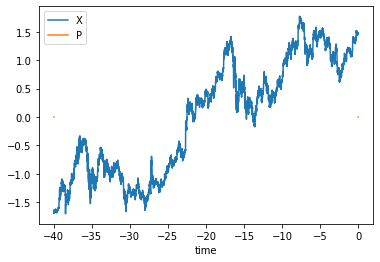

In [7]:
Prices=Prices[['time','X']]
est=Estimator(2)
P=est.fit_transform(Prices)
Prices['P']=P
Prices.plot(x='time',y=['X','P'])

<AxesSubplot:xlabel='time'>

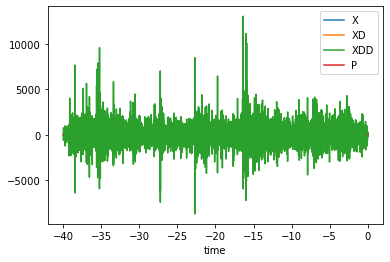

In [8]:
Prices.plot(x='time')

### Estimator +

In [27]:
def LinearRegression(X,Y):
    XX=np.dot(X.T,X)
    XY=np.dot(X.T,Y)
    XX_=np.linalg.inv(XX)
    
    return np.dot(XX_,XY)

class Estimator:
    def Pascal_Triangle(n):
        F=np.array([0.0]*n)
        F[n//2]=1
        M=np.array([F])
        for i in range(n-1):
         F=M[-1]
         DF=np.roll(F,-1)-F
         if(i%2):
            DF=np.roll(DF,1)
         M=np.vstack([M, DF]) 
        
        parity=n%2   
        M[parity::2]=M[parity::2]+np.roll(M[parity::2],(parity*2-1))
        M[parity::2]=M[parity::2]/2
        return M      
    
    def __init__(self,n=6):
         self.n=n+1

    def fit_transform(self,df):
         n=self.n
         dx=df['time'].diff().iloc[1]

         for i in range(1,n):
          df['X'+'D'*i]=df['X'+'D'*(i-1)].shift(1)

         df=df.dropna()
         Lag=LinearRegression(df[['X'+'D'*d for d in range(1,n)]].to_numpy(),df['X'].to_numpy())
         self.lag=Lag
         Lag=([1]+list(-1*Lag))
         

         M=Estimator.Pascal_Triangle(n)
         self.polinomial=np.dot(Lag, np.linalg.inv(M))/dx**np.arange(n)[::-1]
         self.roots=np.roots(self.polinomial[::-1])
            
         Prediction=np.e**np.dot(self.roots.reshape(-1,1),df['time'].to_numpy().reshape(1,-1))
         Coef=LinearRegression(Prediction.T,df['X'].to_numpy())
            
         self.coef=Coef
         Result=np.dot(Coef,Prediction).real
         return [0]*(n-1)+list(Result)


    def predict(self,df):
        
        roots,coef=(self.roots,self.coef)
        X=df['time'].to_numpy()
        Res=np.e**np.dot(self.roots.reshape(-1,1),X.reshape(1,-1))
        Res=np.dot(coef,Res).real
        return Res

<AxesSubplot:xlabel='time'>

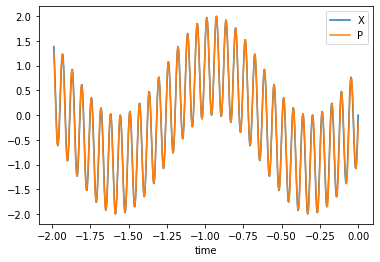

In [28]:
t=np.arange(1000)
t=t-sum(t[[0,-1]])/2
t=t/t[-1]
t=t-1
n=4
est=Estimator(n)
XX=np.sin(5*t)+np.sin(100*t)
df=pd.DataFrame({'time':t,'X':XX})
P=est.fit_transform(df)
df['P']=P
df.iloc[5:].plot(x='time',y=['X','P'])

## Prices

In [296]:
df['X']=df['X'].diff()
df=df.iloc[1:]

C:\Users\azaty\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in power


<AxesSubplot:xlabel='time'>

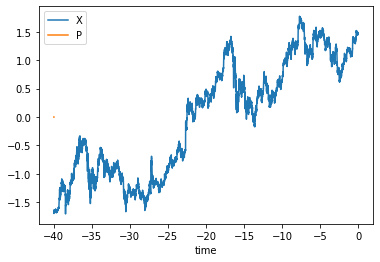

In [298]:
n=8
est=Estimator(n)

P=est.fit_transform(df)
df['P']=P
df.plot(x='time',y=['X','P'])

In [294]:
est.roots

array([-2.22420694e+01+568.78346767j, -2.22420694e+01-568.78346767j,
       -7.36055795e+01+405.93311191j, -7.36055795e+01-405.93311191j,
       -1.35229472e+02+215.87871434j, -1.35229472e+02-215.87871434j,
       -1.64331813e+02  +0.j        , -7.82485190e-02  +0.j        ])

In [13]:
self=est
P=np.e**np.dot(self.roots.reshape(-1,1),df['time'].to_numpy().reshape(1,-1))

C:\Users\azaty\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


In [14]:
self.roots.reshape(-1,1),df['time'].to_numpy().reshape(1,-1)

(array([[-1.05406863e+01+597.24767024j],
        [-1.05406863e+01-597.24767024j],
        [-3.34987108e+01+486.12506483j],
        [-3.34987108e+01-486.12506483j],
        [-6.96490358e+01+326.26673198j],
        [-6.96490358e+01-326.26673198j],
        [-1.68832452e+02  +0.j        ],
        [-1.26056213e+02+152.70721549j],
        [-1.26056213e+02-152.70721549j],
        [-7.52632226e-02  +0.j        ]]),
 array([[-4.00000000e+01, -3.99968789e+01, -3.99937578e+01, ...,
         -6.24219725e-03, -3.12109863e-03,  0.00000000e+00]]))

In [15]:
self.roots

array([-1.05406863e+01+597.24767024j, -1.05406863e+01-597.24767024j,
       -3.34987108e+01+486.12506483j, -3.34987108e+01-486.12506483j,
       -6.96490358e+01+326.26673198j, -6.96490358e+01-326.26673198j,
       -1.68832452e+02  +0.j        , -1.26056213e+02+152.70721549j,
       -1.26056213e+02-152.70721549j, -7.52632226e-02  +0.j        ])

In [282]:
from sympy import pretty_print as pp, latex
from sympy.abc import e,t

class Predictor:
    def __init__(self,roots,coef):
        self.roots=roots
        self.coef=coef
        if(len(roots)!=len(coef)):
            raise ValueError(f"The length of roots({len(roots)}) and coeficients({len(coef)}) doesn't match")
    def _round(K,digit):
        S=-int(np.log10(K))
        S+=digit-1
        return np.round(K,S)
    def __repr__(self):
        rc=[(Predictor._round(r,3),Predictor._round(c,3)) for  r,c in zip(self.roots,self.coef)]
        expr='+'.join([f"({c}*e**({r}*t))" for r,c in rc ])
        pp(eval(expr))
        return ''
    def predict(self,X):
        Res=np.dot(self.roots.reshape(-1,1),X.reshape(1,-1))
        #Res=np.dot(self.coef,Res)
        return Res

In [283]:
roots=est.roots
coef=[1]*len(roots)
P=Predictor(roots,coef)

In [284]:
K=P.predict(df['time'].to_numpy())

In [286]:
roots

array([-2.22420694e+01+568.78346767j, -2.22420694e+01-568.78346767j,
       -7.36055795e+01+405.93311191j, -7.36055795e+01-405.93311191j,
       -1.35229472e+02+215.87871434j, -1.35229472e+02-215.87871434j,
       -1.64331813e+02  +0.j        , -7.82485190e-02  +0.j        ])

In [277]:
K

array([[ 8.89682776e+02-2.27513387e+04j,  8.89613356e+02-2.27495635e+04j,
         8.89543936e+02-2.27477882e+04j, ...,
         1.38839384e-01-3.55045860e+00j,  6.94196922e-02-1.77522930e+00j,
        -0.00000000e+00+0.00000000e+00j],
       [ 8.89682776e+02+2.27513387e+04j,  8.89613356e+02+2.27495635e+04j,
         8.89543936e+02+2.27477882e+04j, ...,
         1.38839384e-01+3.55045860e+00j,  6.94196922e-02+1.77522930e+00j,
         0.00000000e+00-0.00000000e+00j],
       [ 2.94422318e+03-1.62373245e+04j,  2.94399345e+03-1.62360575e+04j,
         2.94376372e+03-1.62347906e+04j, ...,
         4.59460546e-01-2.53391456e+00j,  2.29730273e-01-1.26695728e+00j,
        -0.00000000e+00+0.00000000e+00j],
       ...,
       [ 5.40917887e+03+8.63514857e+03j,  5.40875680e+03+8.63447479e+03j,
         5.40833474e+03+8.63380102e+03j, ...,
         8.44129037e-01+1.34755752e+00j,  4.22064518e-01+6.73778759e-01j,
         0.00000000e+00-0.00000000e+00j],
       [ 6.57327252e+03-0.00000000e+00j,  6.